# Interpolation

Interpolation is a method of constructing new data points based on the range of a discrete set of known data points.

It is also a method to approximate an unknown function when a discrete set of values of that function over some range is known.

The most common types of interpolation are:

- nearest-neighbor
- linear
- polynomial
- spline

### Example

Let us consider function $f(x) = \operatorname{sin}(x)$ evaluated in a range $x = 0..6$

In [1]:
import numpy as np

def f(x):
    return np.sin(x)

npoints = 7
xdat = np.linspace(0,6,npoints)
fdat = f(xdat)

xref = np.linspace(0,6,100)
fref = f(xref)

print('   x', '         ', 'f(x)')
print(np.c_[xdat, fdat])

   x           f(x)
[[ 0.          0.        ]
 [ 1.          0.84147098]
 [ 2.          0.90929743]
 [ 3.          0.14112001]
 [ 4.         -0.7568025 ]
 [ 5.         -0.95892427]
 [ 6.         -0.2794155 ]]


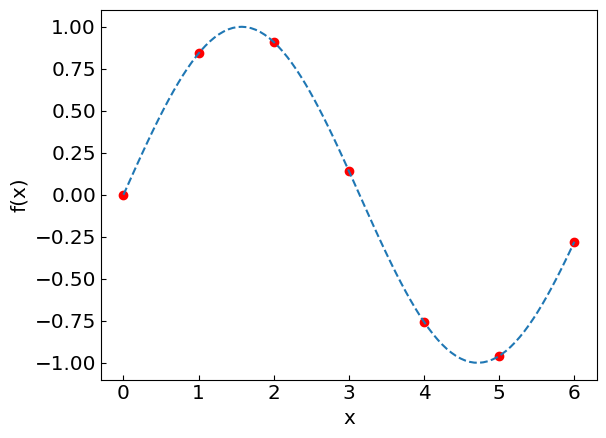

In [2]:
import matplotlib.pyplot as plt

# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xdat,fdat,'or')
plt.plot(xref,fref,'--')
plt.show()

How can we interpolate $f(x)$?

There are several ways

## Nearest-neighbor interpolation

Locate the nearest data value and assign the same value

<img src="img/Piecewise_constant.svg.png" alt="Nearest-neighbor Interpolation" style="width: 400px;"/> 
<center>
    Source: Wikipedia
</center>

<br/>

We have $f(x) \approx f_{nn}(x)$ where

<center>
$f_{nn}(x) = y_i$, 
</center>
where $i$ is such that $|x-x_i|$ is the smallest among all $i$.

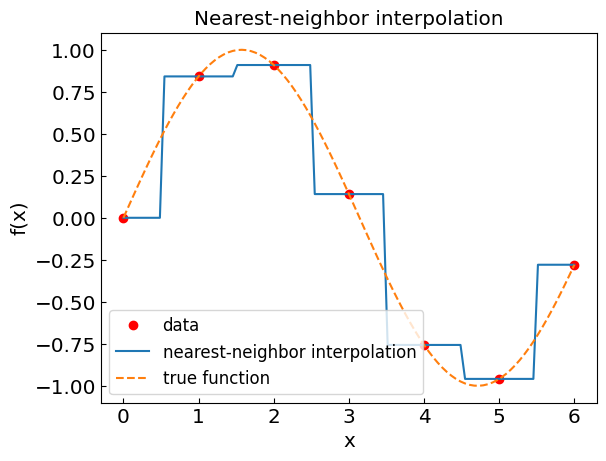

In [3]:
def f_nearestneighbor_int(x, xdata, fdata):
    """Returns the nearest-neighbor interpolation of a function at point x.
    xdata and ydata are the data points used in interpolation.
    xdata is assumed to be in sorted in ascending order."""
    ind = np.searchsorted(xdata, x) # Search the right interval for point x
    if (ind == 0):
        return xdata[0]
    if (ind == len(xdata)):
        return xdata[-1]
    x0,f0 = xdata[ind-1],fdata[ind-1]
    x1,f1 = xdata[ind],fdata[ind]
    if (abs(x-x0) < abs(x-x1)):
        return f0
    else:
        return f1
    
xcalc = np.linspace(0,6,100)
fcalc = [f_nearestneighbor_int(xin,xdat,fdat) for xin in xcalc]

plt.title("Nearest-neighbor interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xdat,fdat,'or',label='data')
plt.plot(xcalc,fcalc,label='nearest-neighbor interpolation')
plt.plot(xref,fref,'--',label='true function')
plt.legend()
plt.show()

## Linear interpolation

In linear interpolation one connect neighboring data point by straight line.

<img src="img/600px-LinearInterpolation.svg.png" alt="Linear Interpolation" style="width: 300px;"/> 
<center>
    Source: Wikipedia
</center>

<br/>

We have $f(x) \approx f_{\rm lerp}(x)$ where
<center>
$f_{\rm lerp}(x) = y_i + \frac{x-x_i}{x_{i+1}-x_i} (y_{i+1} - y_i)$
</center>
where $i$ is such that $x \in (x_i,x_{i+1})$.

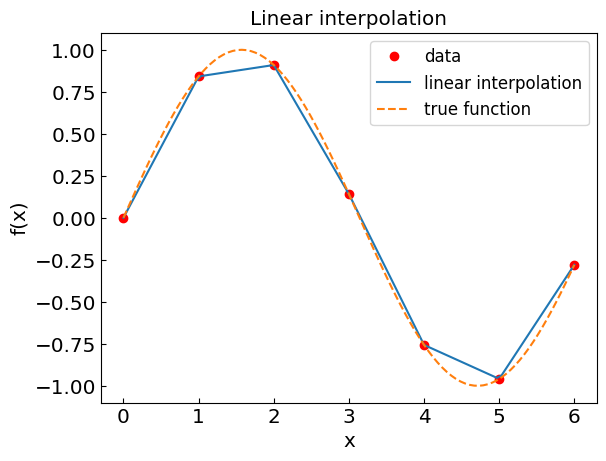

In [4]:
def linear_int(x,x0,f0,x1,f1):
    """Returns the value of a function at point x
    through linear interpolation between points (x0,y0) and (x1,y1)."""
    return f0 + (f1 - f0) * (x-x0) / (x1-x0)


def f_linear_int(x, xdata, fdata):
    """Returns linear interpolation of a function at point x.
    xdata and ydata are the data points used in interpolation.
    xdata is assumed to be in sorted in ascending order."""
    ind = np.searchsorted(xdata, x) # Search the right interval for point x
    if (ind == 0):
        if ((xdata[0] - x) > 1e-12): 
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
        ind = ind + 1
    if (ind == len(xdata)):
        if ((x - xdata[-1]) > 1e-12):
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
        ind = ind - 1
    x0,f0 = xdata[ind-1],fdata[ind-1]
    x1,f1 = xdata[ind],fdata[ind]
    return linear_int(x,x0,f0,x1,f1)
    
# Calculate the values of f(x) using the linear interpolation
xcalc = np.linspace(0,6,100)
fcalc = [f_linear_int(xin,xdat,fdat) for xin in xcalc]

plt.title("Linear interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xdat,fdat,'or',label='data')
plt.plot(xcalc,fcalc,label='linear interpolation')
plt.plot(xref,fref,'--',label='true function')
plt.legend()
plt.show()

The error linear interpolation error is bounded by the value of the second derivative

$$
|R_T| < \frac{(x_{i+1}-x_i)^2}{8} max_{x_i \leq x \leq x_{i+1}} |f''(x)|
$$

for each interval. In our case $x_{i+1} - x_{i} = 1$ and $|f''(x)| = |-sin(x)| < 1$, thus |R_T| < \frac{1}{8} = 0.125

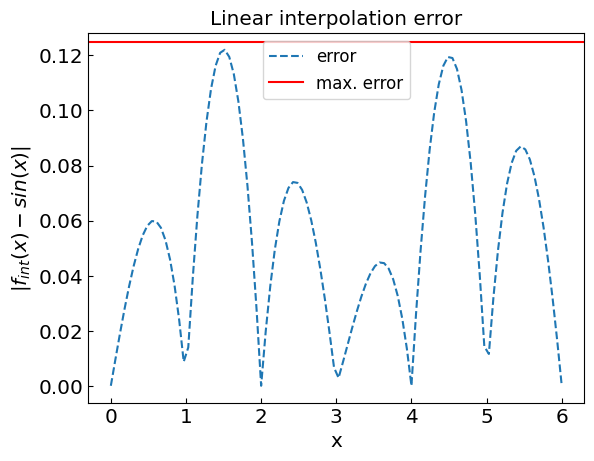

In [5]:
plt.title("Linear interpolation error")
plt.xlabel("x")
plt.ylabel("${|f_{int}(x) - sin(x)|}$")
plt.plot(xref,abs(fref-fcalc),'--',label='error')
plt.axhline(y = 1./8. * (xdat[1]-xdat[0])**2, color = 'r', linestyle = '-',label='max. error')
plt.legend()
plt.show()

## Polynomial interpolation

In polynomial interpolation the function $f(x)$ is approximated by a polynomial.
If there is $n+1$ data points $(x_0,y_0)$,...,$(x_n,y_n)$,
the interpolation is achieved by a \emph{unique} polynomial $p(x)$ of degree $n$.

To construct the interpolating polynomial consider the Lagrange basis functions:
$$
L_{n,j}(x) = \prod_{k\neq j} \frac{x-x_k}{x_j-x_k}.
$$
For each $x = x_k$ one has $L_{n,j}(x_k) = \delta_{kj}$.

Therefore, the interpolating polynomial can be constructed as
$$
p(x) = \sum_{j=0}^n y_j L_{n,j}(x)
$$

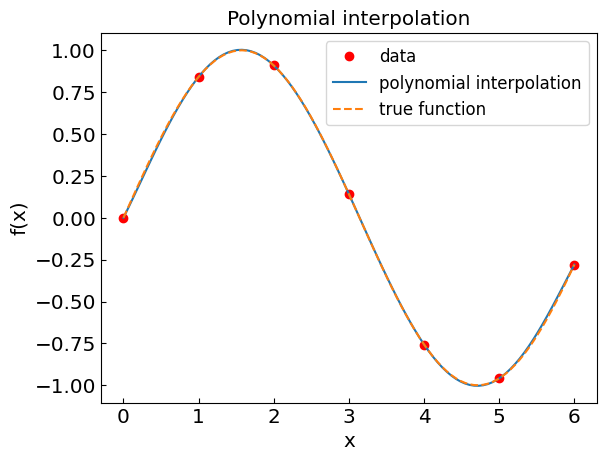

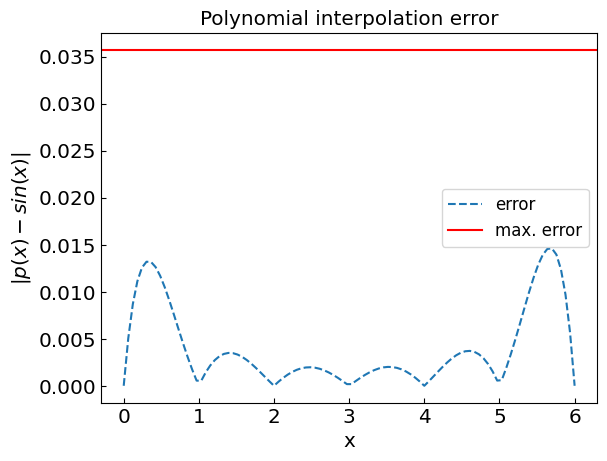

In [6]:
def Lnj(x,n,j,xdata):
    """Lagrange basis function."""
    ret = 1.
    for k in range(0, len(xdata)):
        if (k != j):
            ret *= (x - xdata[k]) / (xdata[j] - xdata[k])
    return ret


def f_poly_int(x, xdata, fdata):
    """Returns the polynomial interpolation of a function at point x.
    xdata and ydata are the data points used in interpolation."""
    ret = 0.
    n = len(xdata) - 1
    for j in range(0, n+1):
        ret += fdata[j] * Lnj(x,n,j,xdata)
    return ret

xpoly = np.linspace(0,6,100)
fpoly = [f_poly_int(xin,xdat,fdat) for xin in xpoly]

plt.title("Polynomial interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xdat,fdat,'or',label='data')
plt.plot(xpoly,fpoly,label='polynomial interpolation')
plt.plot(xref,fref,'--',label='true function')
plt.legend()
plt.show()

plt.title("Polynomial interpolation error")
plt.xlabel("x")
plt.ylabel("${|p(x) - sin(x)|}$")
plt.plot(xref,abs(fref-fpoly),'--',label='error')
n = len(xdat) - 1
plt.axhline(y = (xdat[1]-xdat[0])**n/4./(n+1.), color = 'r', linestyle = '-',label='max. error')
plt.legend()
plt.show()

The error of polynomial interpolation is related to the (n+1)th derivative of the function, as well as of node distribution
$$
R_n (x) = \frac{f^{(n+1)}(\xi)}{n+1} \prod_{i=0}^n (x-x_i)
$$



### Runge's phenomenon

It may be tempting to use a high-degree polynomial for interpolation.
One has to be careful, however, as it can lead to large oscillations at interval edges if the high-order derivatives $f^{(n+1)}$ increase with $n$.

Consider the Runge function
$$
f(x) = \frac{1}{1+25 x^2}
$$

Let us look at the performance of the polynomial interpolation of various order for this function.

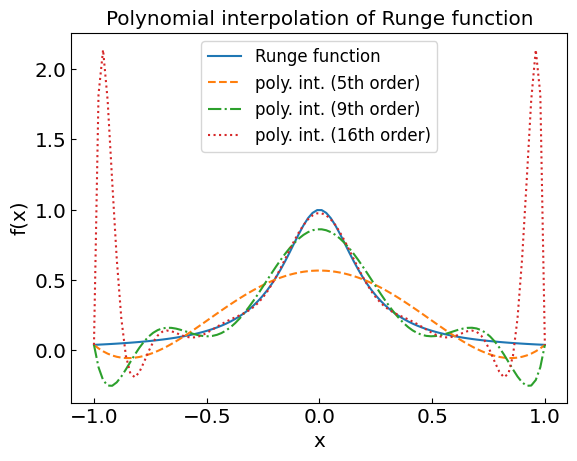

In [7]:
def runge(x):
    return 1. / (1. + 25. * x**2)

# For plotting
xref = np.linspace(-1.,1.,100)
fref = runge(xref)

# 5th order
xpoly5 = np.linspace(-1.,1.,6)
fdata5 = runge(xpoly5)
fpoly5 = [f_poly_int(xin,xpoly5,fdata5) for xin in xref]

# 9th order
xpoly9 = np.linspace(-1.,1.,10)
fdata9 = runge(xpoly9)
fpoly9 = [f_poly_int(xin,xpoly9,fdata9) for xin in xref]

# 15th order
xpoly16 = np.linspace(-1.,1.,16)
fdata16 = runge(xpoly16)
fpoly16 = [f_poly_int(xin,xpoly16,fdata16) for xin in xref]

plt.title("Polynomial interpolation of Runge function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref,label='Runge function')
plt.plot(xref,fpoly5,label='poly. int. (5th order)',linestyle='--')
plt.plot(xref,fpoly9,label='poly. int. (9th order)',linestyle='-.')
plt.plot(xref,fpoly16,label='poly. int. (16th order)',linestyle=':')
plt.legend()
plt.show()

We have real trouble at the end of the intervals!

Can one do something to fix it? So far we have dealt with equidistant nodes:
$$
x_k = a + h k, \qquad k = 0,\ldots,n
$$

The interpolation can be improved by considering nodes which are **not equidistant**

The optimal choice is typically given by *Chebyshev nodes*:
$$
x_k = \cos\left(\frac{2k+1}{2n+2} \pi \right), \qquad k = 0,\ldots,n,
$$
which minimize the product $\prod_{i=0}^n (x-x_i)$

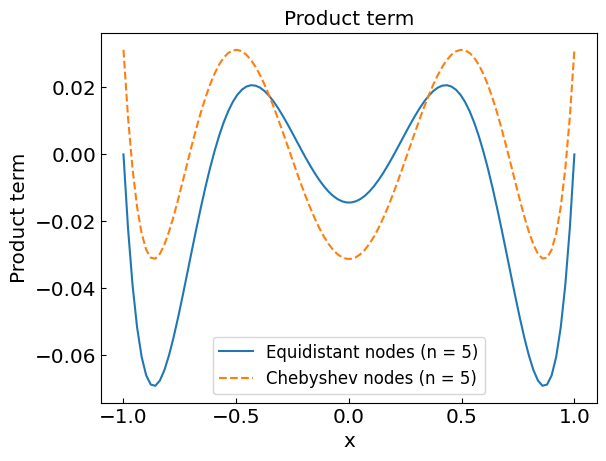

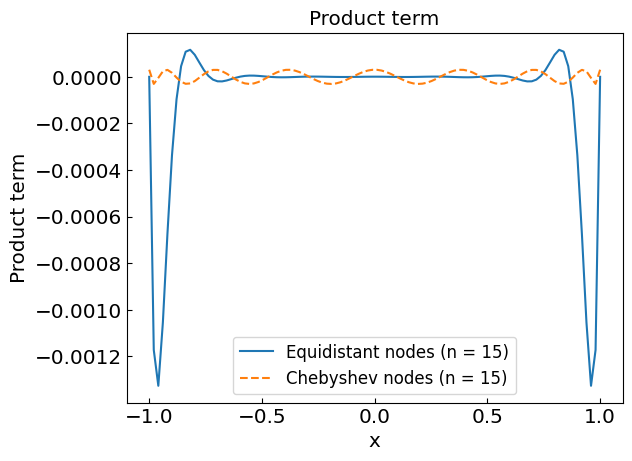

In [9]:
def equidistant_nodes(n,a,b):
    h = (b-a) / n
    return [a + h * k for k in range(n+1)]

def chebyshev_nodes(n,a,b):
    return [(a+b)/2. + (b-a) / 2. * np.cos((2.*k+1.)/(2.*n+2.)*np.math.pi) for k in range(n+1)]

def product_nodes(x,nodes):
    ret = 1.
    for i in range(len(nodes)):
        ret *= (x - nodes[i])
    return ret

for n in range(5,16,10):
    nodes_equidistant = equidistant_nodes(n,-1.,1.)
    f_prod_equidistant = [product_nodes(xin,nodes_equidistant) for xin in xref]
    nodes_chebyshev = chebyshev_nodes(n,-1.,1.)
    f_prod_chebyshev = [product_nodes(xin,nodes_chebyshev) for xin in xref]

    plt.title("Product term")
    plt.xlabel("x")
    plt.ylabel("Product term")
    plt.plot(xref,f_prod_equidistant,label='Equidistant nodes (n = ' + str(n) + ')')
    plt.plot(xref,f_prod_chebyshev,label='Chebyshev nodes (n = ' + str(n) + ')',linestyle='--')
    plt.legend()
    plt.show()

Now let us try to interpolate the Runge function by using Chebyshev nodes

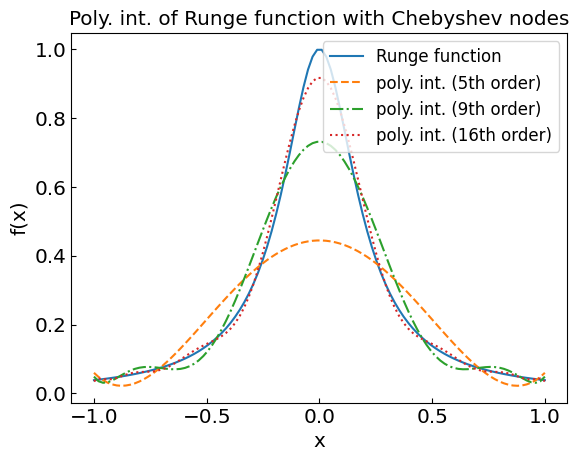

In [12]:
# 5th order
xpoly5 = chebyshev_nodes(5,-1.,1.)
fdata5 = [runge(xin) for xin in xpoly5]
fpoly5 = [f_poly_int(xin,xpoly5,fdata5) for xin in xref]

# 9th order
xpoly9 = chebyshev_nodes(9,-1.,1.)
fdata9 = [runge(xin) for xin in xpoly9]
fpoly9 = [f_poly_int(xin,xpoly9,fdata9) for xin in xref]

# 15th order
xpoly16 = chebyshev_nodes(15,-1.,1.)
fdata16 = [runge(xin) for xin in xpoly16]
fpoly16 = [f_poly_int(xin,xpoly16,fdata16) for xin in xref]

plt.title("Poly. int. of Runge function with Chebyshev nodes")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref,label='Runge function')
plt.plot(xref,fpoly5,label='poly. int. (5th order)',linestyle='--')
plt.plot(xref,fpoly9,label='poly. int. (9th order)',linestyle='-.')
plt.plot(xref,fpoly16,label='poly. int. (16th order)',linestyle=':')
plt.legend()
plt.show()

### Spline interpolation

Spline interpolation combines the polynomial interpolation and piecewise matching by describing the function at each interval by a low-degree polynomial. 

In case of cubic splines, for each interval $x_i < x < x_{i+1}$, the function is approximated by a 3rd degree polynomial
$$
f(x) \approx s_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i.
$$

The coefficients $a_i$, $b_i$, $c_i$, $d_i$ are determined ensuring the continuity of the function and its first and second derivatives at all node points, as well as by matching the function values to the data points.

Spline interpolation avoids problems of high-degree polynomials and provides a better accuracy than linear interpolation. One has to nevertheless be on the lookout for possible artefacts, especially when evaluating the derivatives.

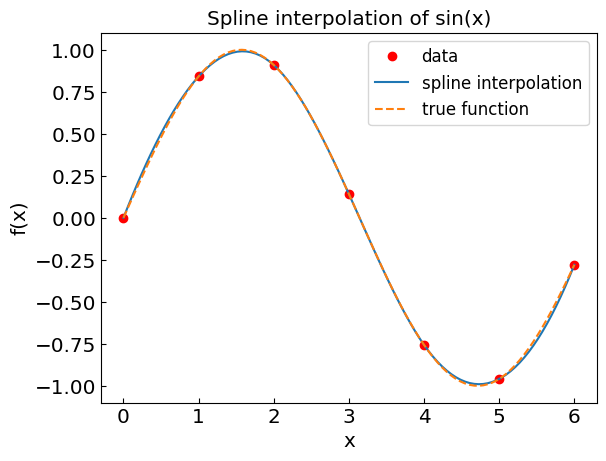

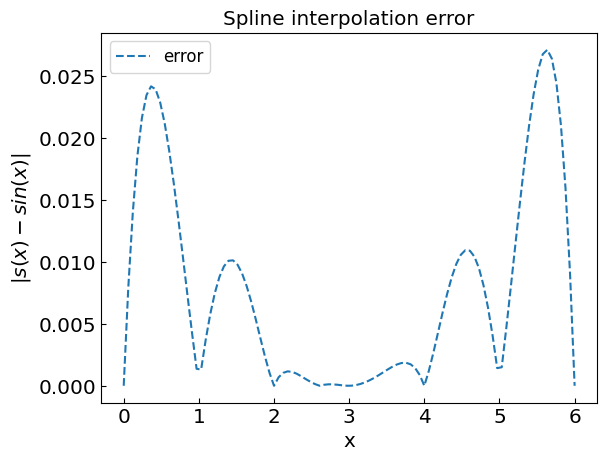

In [13]:
from scipy.interpolate import CubicSpline

n = 6
xdat = np.linspace(0,6,n+1)
fdat = f(xdat)
spline_sine = CubicSpline(xdat,fdat)
xref = np.linspace(0,6,100)
fref = f(xref)

fspline = spline_sine(xref)

plt.title("Spline interpolation of sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xdat,fdat,'or',label='data')
plt.plot(xref,fspline,label='spline interpolation')
plt.plot(xref,fref,'--',label='true function')
plt.legend()
plt.show()

plt.title("Spline interpolation error")
plt.xlabel("x")
plt.ylabel("${|s(x) - sin(x)|}$")
plt.plot(xref,abs(fref-fspline),'--',label='error')
plt.legend()
plt.show()

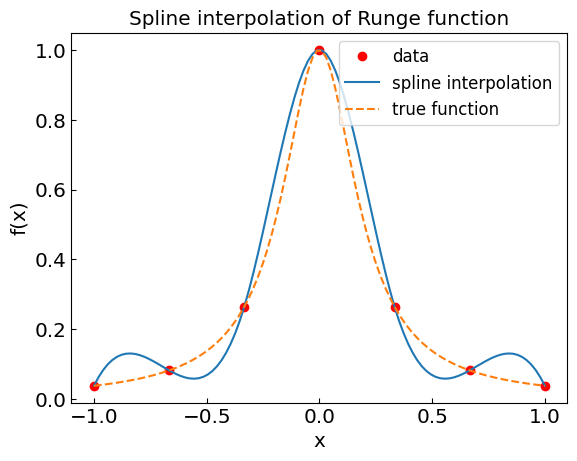

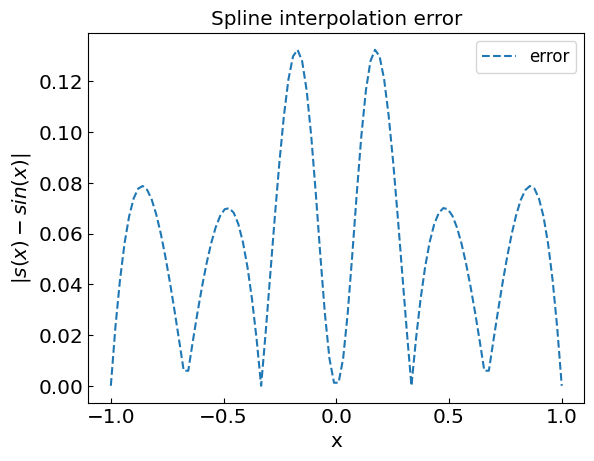

In [14]:
n = 6
xdat = np.linspace(-1,1,n+1)
fdat = runge(xdat)
spline_runge = CubicSpline(xdat,fdat)
xref = np.linspace(-1,1,100)
fref = runge(xref)

fspline = spline_runge(xref)

plt.title("Spline interpolation of Runge function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xdat,fdat,'or',label='data')
plt.plot(xref,fspline,label='spline interpolation')
plt.plot(xref,fref,'--',label='true function')
plt.legend()
plt.show()

plt.title("Spline interpolation error")
plt.xlabel("x")
plt.ylabel("${|s(x) - sin(x)|}$")
plt.plot(xref,abs(fref-fspline),'--',label='error')
plt.legend()
plt.show()

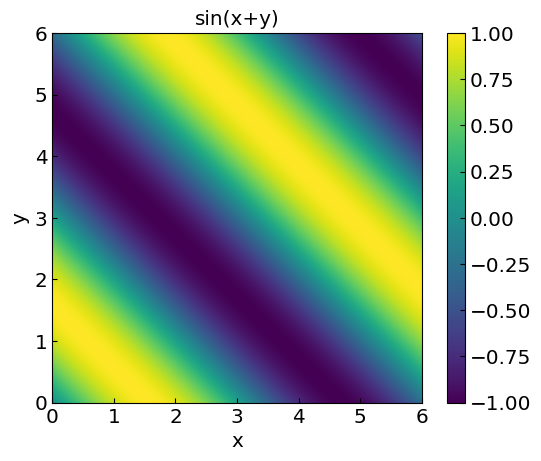

In [15]:
xplot = np.linspace(0,6,200)
yplot = np.linspace(0,6,200)

X, Y = np.meshgrid(xplot, yplot)

funclabel = "sin(x+y)"
func2D = np.sin(X+Y)

#plt.contourf(X, Y, Vdip, 10)
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
CS = plt.imshow(func2D, vmax=1., vmin=-1.,origin="lower",extent=[0,6,0,6])
plt.colorbar(CS)
plt.show()

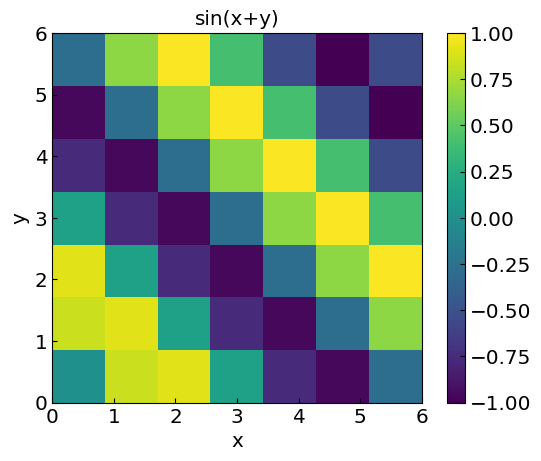

In [16]:
npoints = 7
xdat = np.linspace(0,6,npoints)
ydat = np.linspace(0,6,npoints)

fdat = []
for xin in xdat:
    ftmp = []
    for yin in ydat:
        ftmp.append(np.sin(xin + yin))
    fdat.append(ftmp)

# plot the data points
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
CS = plt.imshow(fdat, vmax=1., vmin=-1.,origin="lower",extent=[0,6,0,6])
plt.colorbar(CS)
plt.show()

<!-- As you can see, `imshow` essentially uses nearest-neighbor interpolation by default when we plot the data points
-->

Let us implement nearest-neighbor interpolation

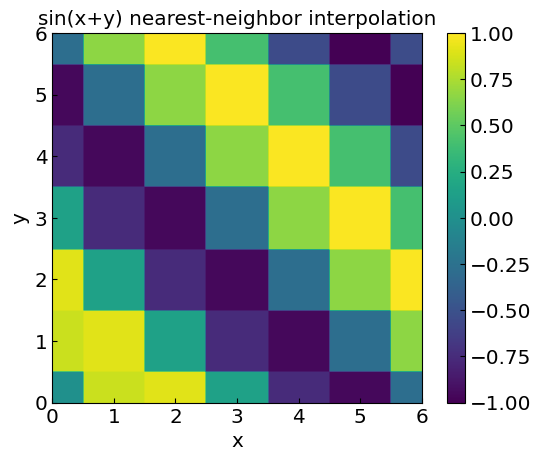

In [17]:
def f_nearestneighbor_2D(x, y, xdata, ydata, fdata):
    """Returns the nearest-neighbor interpolation of a 2D function at point x.
    xdata and ydata is the regular grid used in interpolation.
    fdata are the data points along the grid."""
    # Search for the nearest neighbor for coordinate x
    indX = np.searchsorted(xdata, x)
    
    if (indX == 0):
        if ((xdata[0] - x) > 1e-12): 
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
    elif (indX == len(xdata)):
        if ((x - xdata[-1]) > 1e-12): 
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
        indX = indX - 1
    else:
        x0,x1 = xdata[indX-1],xdata[indX]
        if (abs(x-x0) < abs(x-x1)):
            indX = indX - 1
    
    # Search for the nearest neighbor for coordinate y
    indY = np.searchsorted(ydata, y) # Search the interval for coordinate y
    if (indY == 0):
        if ((ydata[0] - y) > 1e-12): 
            print("y = ", y, " is outside the interpolation range [",ydata[0],",",ydata[-1],"]")
    elif (indY == len(ydata)):
        if ((y - ydata[-1]) > 1e-12): 
            print("y = ", y, " is outside the interpolation range [",ydata[0],",",ydata[-1],"]")
        indY = indY - 1
    else:
        y0,y1 = ydata[indY-1],ydata[indY]
        if (abs(y-y0) < abs(y-y1)):
            indY = indY - 1
    
    return fdata[indX][indY]

# compute the function values using NN interpolation for plotting
fvals = []
for xin in xplot:
    ftmp = []
    for yin in yplot:
        ftmp.append(f_nearestneighbor_2D(xin, yin, xdat, ydat, fdat))
    fvals.append(ftmp)

# plot the data points
plt.title(funclabel + " nearest-neighbor interpolation")
plt.xlabel("x")
plt.ylabel("y")
CS = plt.imshow(fvals, vmax=1., vmin=-1.,origin="lower",extent=[0,6,0,6])
plt.colorbar(CS)
plt.show()

Let us now consider linear splines in two dimensions -- the *bilinear interpolation*


<img src="img/BilinearInterpolationV2.svg.png" alt="Bilinear Interpolation" style="width: 300px;"/> 
<center>
    Source: Wikipedia
</center>

<br/>

For a bilinear interpolation on a regular grid we apply the linear interpolation twice:
1. Find $(x_1,x_2)$ and $(y_1,y_2)$ such that $x \in (x_1,x_2)$ and $y \in (y_1,y_2)$
2. Calculate $R_1$ and $R_2$ for $y = y_1$ and $y = y_2$, respectively, by applying linear interpolation in $x$
3. Calculate the interpolated function value at $(x,y)$ by performing linear interpolation in $y$ using the computed values of $R_1$ and $R_2$

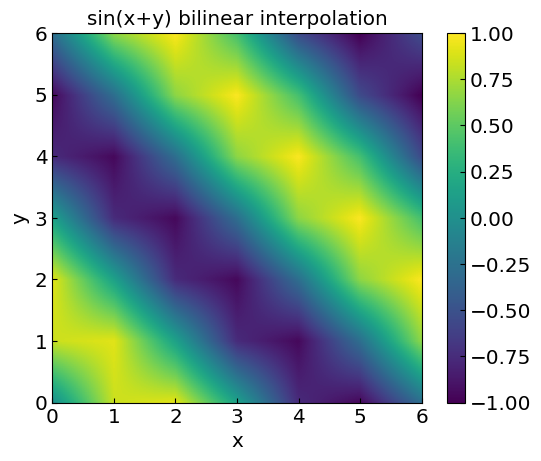

In [18]:
def f_bilinear(x, y, xdata, ydata, fdata):
    """Returns the bilinear interpolation of a 2D function at point x.
    xdata and ydata is the regular grid used in interpolation.
    fdata are the data points along the grid."""
    # Search the interval for coordinate x
    indX = np.searchsorted(xdata, x)
    if (indX == 0):
        if ((xdata[0] - x) > 1e-12): 
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
        indX = indX + 1
    elif (indX == len(xdata)):
        if ((x - xdata[-1]) > 1e-12): 
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
        indX = indX - 1
        
    # Search for the interval for coordinate y
    indY = np.searchsorted(ydata, y) # Search the interval for coordinate y
    if (indY == 0):
        if ((ydata[0] - y) > 1e-12): 
            print("y = ", y, " is outside the interpolation range [",ydata[0],",",ydata[-1],"]")
        indY = indY + 1
    elif (indY == len(ydata)):
        if ((y - ydata[-1]) > 1e-12): 
            print("y = ", y, " is outside the interpolation range [",ydata[0],",",ydata[-1],"]")
        indY = indY - 1
    
    # First do linear interpolation in x for both y0 and y1
    x1,x2   = xdata[indX - 1], xdata[indX]
    y1,y2   = ydata[indY - 1], ydata[indY]
    
    # Linear interpolation in x at y = y0
    f1x,f2x = fdata[indX - 1][indY - 1], fdata[indX][indY - 1]
    f1 = linear_int(x, x1, f1x, x2, f2x)
    
    # Linear interpolation in x at y = y1
    f1x,f2x = fdata[indX - 1][indY], fdata[indX][indY]
    f2 = linear_int(x, x1, f1x, x2, f2x)
    
    # Finally, linear interpolation in y at x = x
    fret = linear_int(y, y1, f1, y2, f2) 
    
    return fret

# compute the function values using NN interpolation for plotting
fvals = []
for xin in xplot:
    ftmp = []
    for yin in yplot:
        ftmp.append(f_bilinear(xin, yin, xdat, ydat, fdat))
    fvals.append(ftmp)

# plot the data points
plt.title(funclabel + " bilinear interpolation")
plt.xlabel("x")
plt.ylabel("y")
CS = plt.imshow(fvals, vmax=1., vmin=-1.,origin="lower",extent=[0,6,0,6])
plt.colorbar(CS)
plt.show()

Compare with exact calculation

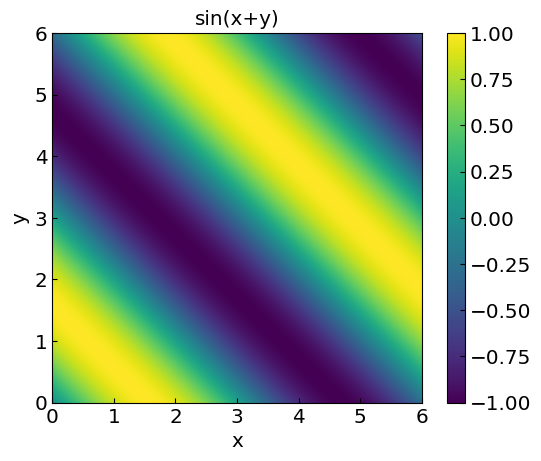

In [19]:
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
CS = plt.imshow(func2D, vmax=1., vmin=-1.,origin="lower",extent=[0,6,0,6])
plt.colorbar(CS)
plt.show()